# Imports

In [1]:
!pip install pandas
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
import ast
import json

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import gc 
gc.collect()

4

In [3]:
import statistics as stat

# Chargement des données

Ici pour l'instant on teste sur une version raccourcie du jeu de données sinon c'est trop long. 

In [4]:
# Opening JSON file small version
#with open('train_porto_tokenized_small_1st_partV2.json', 'r') as openfile:
# Opening JSON file full version
with open('train_clean_truncated.json', 'r') as openfile:

 
    # Reading from json file
    json_loaded = json.load(openfile)
 
# print(json_loaded)
print(type(json_loaded))

<class 'dict'>


On met en dataframe les données chargées.

In [5]:
data_clean_truncated = pd.DataFrame(data=json_loaded)

On vérifie la tête de nos données et leur type :

In [6]:
data_clean_truncated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1666766 entries, 0 to 1710669
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRIP_ID          1666766 non-null  int64  
 1   CALL_TYPE        1666766 non-null  object 
 2   ORIGIN_CALL      362170 non-null   float64
 3   ORIGIN_STAND     796269 non-null   float64
 4   TAXI_ID          1666766 non-null  int64  
 5   TIMESTAMP        1666766 non-null  int64  
 6   DAY_TYPE         1666766 non-null  object 
 7   MISSING_DATA     1666766 non-null  bool   
 8   POLYLINE         1666766 non-null  object 
 9   Tokenization     1666766 non-null  object 
 10  Nb_points        1666766 non-null  int64  
 11  Nb_points_token  1666766 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 154.2+ MB


In [48]:
#data_clean_truncated=data_clean_truncated.drop('Nb_points_token', axis=1)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,Tokenization,Nb_points
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...","[8a7b63adb347fff, 8a7b63adb35ffff, 8a7b63adbad...",23
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...","[8a7b63ad8047fff, 8a7b63ad8047fff, 8a7b63ad814...",19
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...","[8a7b63adb2cffff, 8a7b63adb2cffff, 8a7b63adb2e...",65
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...","[8a7b63370727fff, 8a7b63370727fff, 8a7b6337072...",43
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...","[8a7b63adea37fff, 8a7b63adea37fff, 8a7b63adea0...",29
...,...,...,...,...,...,...,...,...,...,...,...
1710663,1388660427620000585,C,NaN,NaN,20000585,1388660427,A,False,"[[-8.60697, 41.162283], [-8.60697, 41.16231], ...","[8a7b63374857fff, 8a7b63374857fff, 8a7b6337485...",194
1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469, 41.14602], [-8.612487, 41.145993]...","[8a7b63adb297fff, 8a7b63adb297fff, 8a7b63adb29...",32
1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138, 41.140845], [-8.610174, 41.140935...","[8a7b63375957fff, 8a7b63375957fff, 8a7b63adb2c...",30
1710668,1404141826620000248,B,NaN,12.0,20000248,1404141826,A,False,"[[-8.630712, 41.154885], [-8.63073, 41.154813]...","[8a7b63adb907fff, 8a7b63adb907fff, 8a7b63adb90...",62


# Analyse statistique des attributs du dataset

Le but ici est de pouvoir évaluer quels attributs parmi le CALL_TYPE, le TAXI_ID, le TIMESTAMP, le DAY_TYPE et MISSING_DATA pourraient être pris dans les données de contextes.

In [12]:
# On stocke le nb d'entrée ie de lignes dqns le dataset
nb_total_entries = len(data_clean_truncated.index)

## Call type

In [50]:
data_clean_truncated['CALL_TYPE'].count()==nb_total_entries

True

Il ne manque jamais cette colonne.

In [51]:
stat.mode(data_clean_truncated['CALL_TYPE'])

'B'

Le mode (valeur la plus fréquente) est B.

<AxesSubplot:>

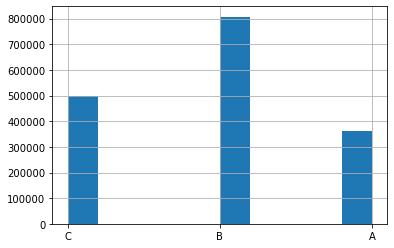

In [52]:
data_clean_truncated['CALL_TYPE'].hist()

In [53]:
data_clean_truncated.groupby('CALL_TYPE').size()

CALL_TYPE
A    362170
B    807446
C    497150
dtype: int64

__Conclusion :__ on prend l'attribut 'CALL_TYPE' dans le contexte.

## Taxi id

In [54]:
data_clean_truncated['TAXI_ID'].count()==nb_total_entries

True

Il ne manque jamais cette colonne.

On peut regarder le nombre de trajets enregistrés pour chaque taxi (identifiés par leur id).

In [55]:
data_clean_truncated.groupby('TAXI_ID').size()

TAXI_ID
20000001    2735
20000002    3751
20000003    1868
20000004    4887
20000005    6051
            ... 
20000903    2332
20000904    4925
20000941       4
20000969      25
20000981       1
Length: 442, dtype: int64

In [56]:
data_clean_truncated.groupby('TAXI_ID').size().mean(),stat.median(data_clean_truncated.groupby('TAXI_ID').size())

(3770.9638009049772, 3694.0)

<AxesSubplot:>

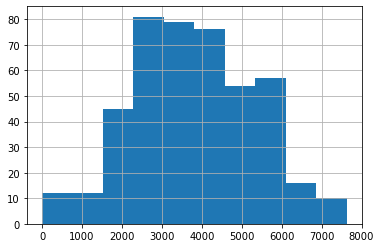

In [57]:
data_clean_truncated.groupby('TAXI_ID').size().hist()


__Conclusion :__ on peut prendre l'attribut 'TAXI_ID' dans le contexte.

## Day type

Le mode est A.

In [58]:
stat.mode(data_clean_truncated['DAY_TYPE'])

'A'

Le problème est qu'on n'a que le type de jour A :

<AxesSubplot:>

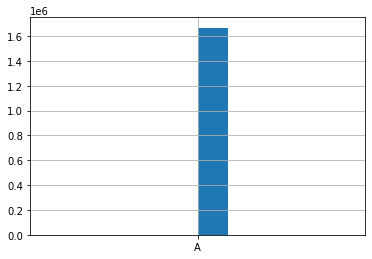

In [59]:
data_clean_truncated['DAY_TYPE'].hist()

In [60]:
'A' in data_clean_truncated['DAY_TYPE'].to_list()

True

In [61]:
('B' or 'C') in data_clean_truncated['DAY_TYPE'].to_list()

False

__Conclusion :__ on ne prend pas l'attribut 'DAY_TYPE' dans le contexte.

## Missing data

Le mode est False.

In [62]:
stat.mode(data_clean_truncated['MISSING_DATA'])

False

On a trop peu d'occurences pour la classe 'True'.

In [63]:
import operator as op

print(f"{False} has occurred {op.countOf(data_clean_truncated['MISSING_DATA'], False)} times")

False has occurred 1666758 times


In [64]:

print(f"{True} has occurred {op.countOf(data_clean_truncated['MISSING_DATA'], True)} times")

True has occurred 8 times


On avait le champ rempli pour chaque trajectoire (cf le .info plus haut): il y a juste très peu de Missing_data à True.

__Conclusion :__ on ne prend pas l'attribut 'MISSING_DATA' dans le contexte.

## Timestamp

Le TES ayant démontré l'intêrét de prendre en compte le timestamp comme information de contexte, nous intégrerons cet élément à notre contexte en entrée de BERT. Nous l'utiliserons en priorité pour nos premiers tests.

On vérifie que le nombre de trajet par valeur d'horodatage :

In [27]:
data_clean_truncated.groupby('TIMESTAMP').size()

TIMESTAMP
1372636853    1
1372636854    1
1372636858    1
1372636875    1
1372636896    1
             ..
1404172578    1
1404172626    1
1404172716    1
1404172718    1
1404172736    1
Length: 1614151, dtype: int64

In [17]:
# Rq : le timestamp n'est pas unique
len(data_clean_truncated.groupby('TIMESTAMP'))!=nb_total_entries 
# this function helps  to find the unique values in a column
#data_clean_truncated['TIMESTAMP'].unique()


False

<AxesSubplot:>

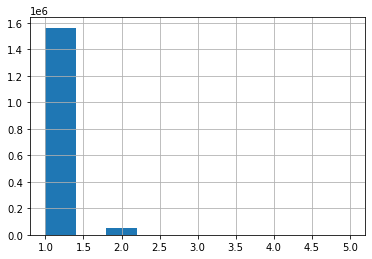

In [33]:
data_clean_truncated.groupby('TIMESTAMP').size().hist()

Remarque : on a quelques timestamps qui apparaissent plusieurs fois, mais il faut les interpréter comme des coincidences.

## Remarque : matrice de corrélation 

In [66]:
data_clean_truncated.corr()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,Nb_points,Nb_points_token
TRIP_ID,1.000000,0.026924,0.001904,-0.000919,1.000000,-0.000691,0.011623,0.009131
ORIGIN_CALL,0.026924,1.000000,NaN,-0.002021,0.026924,-0.001249,-0.054190,-0.051549
ORIGIN_STAND,0.001904,NaN,1.000000,0.016102,0.001904,0.000782,-0.044596,-0.039864
TAXI_ID,-0.000919,-0.002021,0.016102,1.000000,-0.000919,0.002133,0.011546,0.013129
TIMESTAMP,1.000000,0.026924,0.001904,-0.000919,1.000000,-0.000691,0.011623,0.009131
MISSING_DATA,-0.000691,-0.001249,0.000782,0.002133,-0.000691,1.000000,0.003671,0.003406
Nb_points,0.011623,-0.054190,-0.044596,0.011546,0.011623,0.003671,1.000000,0.910556
Nb_points_token,0.009131,-0.051549,-0.039864,0.013129,0.009131,0.003406,0.910556,1.000000


In [ ]:
#TODO : regarder pourquoi pas 1 de corrélation entre Nb_points et Nb_points_token

__Conclusion :__ Les attributs n'étant pas corrélés entre eux, on n'a pas d'objection de ce côté pour prendre des attributs en même temps. 

## Autres
On regarde quelques caractéristiques indépendantes du contexte.
### Trajectoires : longueur

(Après troncature)

In [19]:
stat.median(data_clean_truncated['Nb_points']), stat.mean(data_clean_truncated['Nb_points']), stat.mode(data_clean_truncated['Nb_points'])

(42.0, 49.48624581974914, 35)

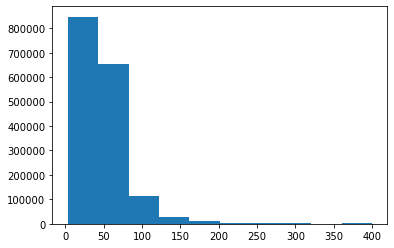

In [20]:
import matplotlib.pyplot as plt


# create histogram
plt.hist(data_clean_truncated['Nb_points'].to_list())
# display histogram
plt.show()


In [21]:
max(data_clean_truncated['Nb_points'])

400